In [25]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


Evaluating: Logistic Regression
Accuracy: 0.9069
Precision: 0.9073
Recall: 0.9069
F1 Score: 0.9069
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       298
           1       0.89      0.92      0.91       282

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580



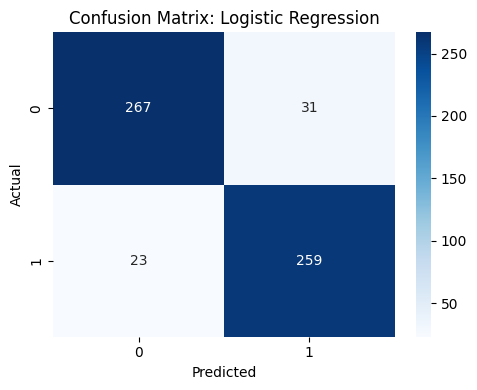


Evaluating: Random Forest
Accuracy: 0.9034
Precision: 0.9036
Recall: 0.9034
F1 Score: 0.9035
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       298
           1       0.90      0.91      0.90       282

    accuracy                           0.90       580
   macro avg       0.90      0.90      0.90       580
weighted avg       0.90      0.90      0.90       580



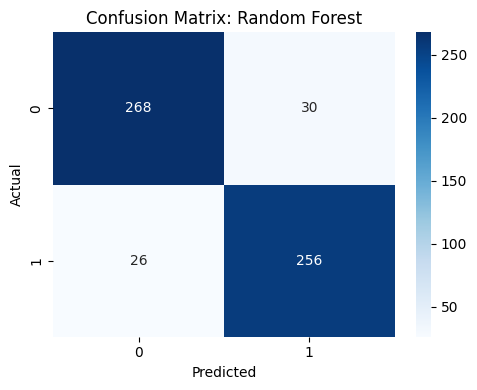


Evaluating: Support Vector Machine
Accuracy: 0.9172
Precision: 0.9183
Recall: 0.9172
F1 Score: 0.9172
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       298
           1       0.90      0.94      0.92       282

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



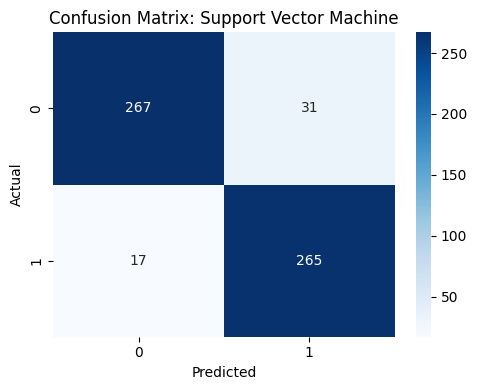


Evaluating: Decision Tree Classifier
Accuracy: 0.8534
Precision: 0.8539
Recall: 0.8534
F1 Score: 0.8535
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       298
           1       0.84      0.87      0.85       282

    accuracy                           0.85       580
   macro avg       0.85      0.85      0.85       580
weighted avg       0.85      0.85      0.85       580



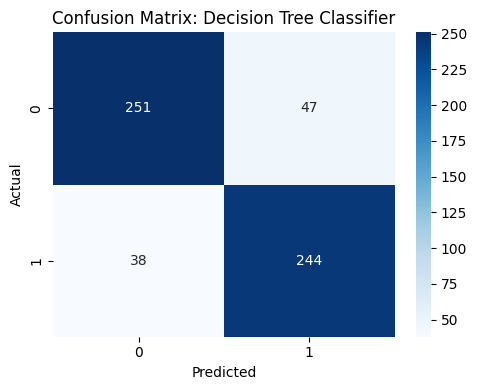


Evaluating: MLP Classifier
Accuracy: 0.9155
Precision: 0.9168
Recall: 0.9155
F1 Score: 0.9155
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       298
           1       0.89      0.94      0.92       282

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



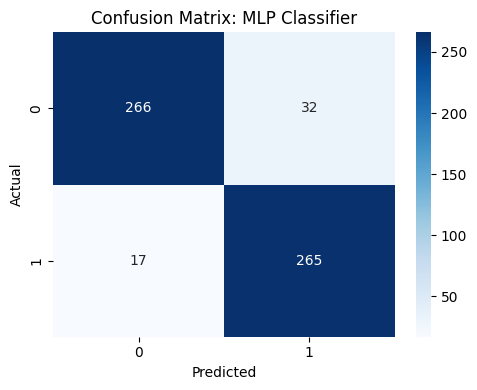


Evaluating: Gradient Boosting Classifier
Accuracy: 0.9172
Precision: 0.9183
Recall: 0.9172
F1 Score: 0.9172
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       298
           1       0.90      0.94      0.92       282

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



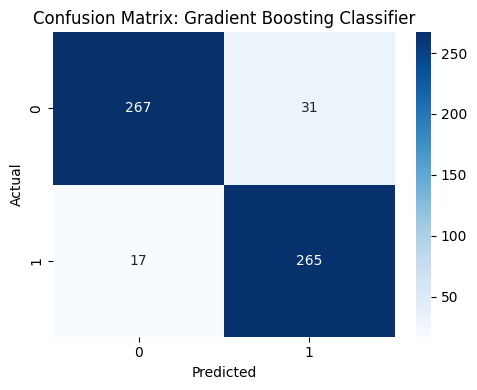


Evaluating: K Neighbors Classifier
Accuracy: 0.9138
Precision: 0.9152
Recall: 0.9138
F1 Score: 0.9138
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       298
           1       0.89      0.94      0.91       282

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.92      0.91      0.91       580



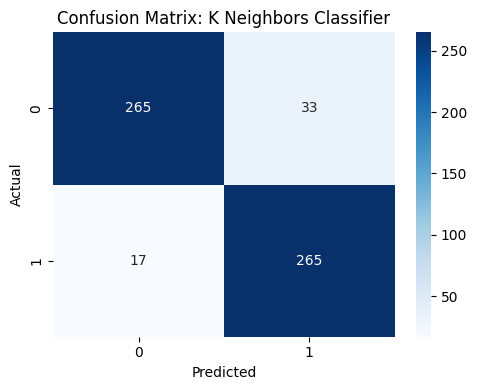

In [37]:
dataset_path = "/kaggle/input/output"
# load saved model
model_dir = "/kaggle/input/output/saved_models" 

# load test data
test_data = pd.read_csv(f"{dataset_path}/test_data.csv")
X_test = test_data.drop("Personality", axis=1)
y_test = test_data["Personality"]

# List models name
models_to_test = {
    "Logistic Regression": "logistic_regression.pkl",
    "Random Forest": "random_forest_classifier.pkl",
    "Support Vector Machine": "support_vector_classifier.pkl",
    "Decision Tree Classifier": "decision_tree_classifier.pkl",
    "MLP Classifier": "mlp_classifier.pkl",
    "Gradient Boosting Classifier": "gradient_boosting_classifier.pkl",
    "K Neighbors Classifier": "knn.pkl"
}

# Evaluate all models
for model_name, file_name in models_to_test.items():
    print(f"\nEvaluating: {model_name}")

    # Load model
    model_path = f"{model_dir}/{file_name}"
    model = joblib.load(model_path)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Print scores
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
